In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager._load_fontmanager(try_read_cache=False)

Matplotlib is building the font cache; this may take a moment.


In [11]:
plt.rcParams['font.family'] = 'Vollkorn' 

In [3]:
df = pd.read_json("../outputs/aya_ceb_stats.json")

In [4]:
df = df.transpose().fillna(0)

In [5]:
row_sums = df.sum(axis=1)
df = df[row_sums>=100]
percent_df = df.div(row_sums, axis=0).dropna() * 100
percent_df.index = percent_df.index.str.replace(r'\(T\)', '', regex=True)

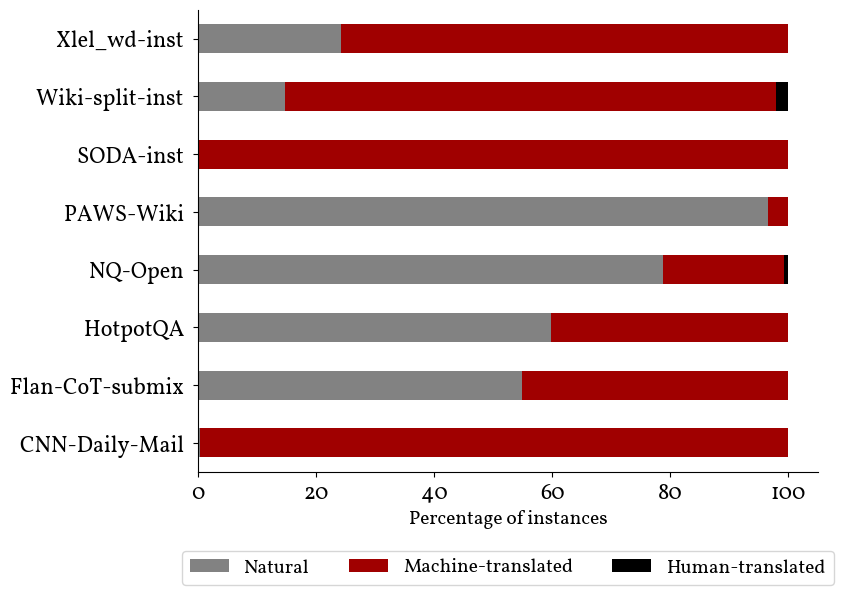

In [17]:
colors = ["#828282", "#a00000", "#000000"]
ax = percent_df.plot(kind='barh', stacked=True, figsize=(8, 6), color=colors)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Percentage of instances', fontsize=14)
ax.legend(title='', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3, fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig("dataset_distrib.png", dpi=300, bbox_inches="tight", transparent=True)